# Clustering Color Data from Images

## Intro
- For our project, we would like to cluster the colors in a given image. There are many use cases about clustering on the internet. The reason why we choose this topic is we would like to discover more about image analysis, representing major color components in an image and search similar images by a given color.
- There are two part in our project. The first one is using clustering to find colors in one image and make it into a color palette. The second part is using clustering to find images by certain color.
- References:
    - https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71
    - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-contexts

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
#Author: Adam

### Part 1
Find colors from image and create a color palette.

In [2]:
#Loaded Image Sample
image1_path = './Anna_&_Adam_Project_Image.jpg'
image1 = cv2.imread(image1_path)
#image1 source: https://all-free-download.com/free-photos/download/hd-picture-of-the-beautiful-natural-scenery-03_166249.html
#Author: Adam

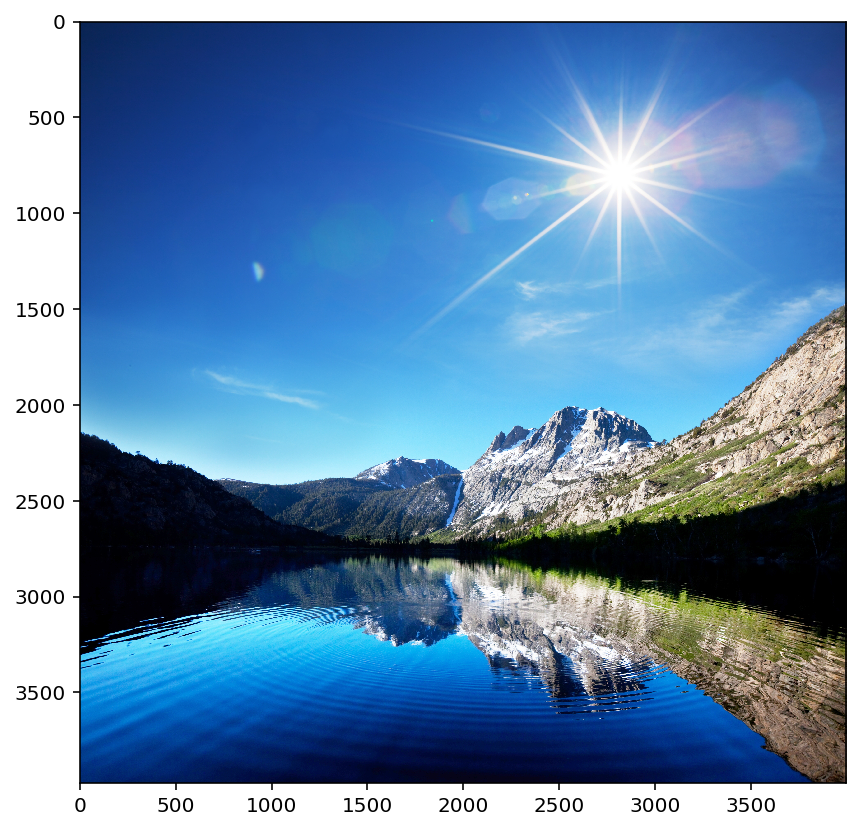

In [3]:
#Convert image into Red, Green, Blue (RGB) to get original image
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
#Author: Adam

In [4]:
#RGB to Hex Conversion-Used for labels on the pie chart
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
#Author: Adam

In [5]:
#Function that extracts colors from the image
def get_colors(image, number_of_colors, show_chart):
    from operator import itemgetter
    
    #lessen the pixels by smaller the picture to reduce time in extracting colors
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    #form clusters
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_

    # We get ordered colors by iterating through the keys
    keys = [e[0] for e in sorted(counts.items(), key=itemgetter(1))]
    ordered_colors = [center_colors[i]/255 for i in keys]
    hex_colors = [RGB2HEX(ordered_color*255) for ordered_color in ordered_colors]
    rgb_colors = [ordered_color*255 for ordered_color in ordered_colors]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(sorted(counts.values()), labels = hex_colors, colors = ordered_colors)
        current_palette = sns.color_palette(hex_colors)
        sns.palplot(current_palette)
    return rgb_colors
#Author: Adam & Anna

[array([164.52934015, 157.00040581, 139.95414333]),
 array([106.10397141, 104.3604612 ,  79.22608051]),
 array([208.21384865, 216.06431069, 221.10427073]),
 array([ 3.7385141 ,  7.43747007, 19.5202899 ]),
 array([ 14.1217447 ,  49.35117991, 112.74711206]),
 array([ 28.04122416,  86.93869714, 170.67916746]),
 array([ 54.46041478, 137.8342739 , 210.72117327]),
 array([111.30966646, 187.85281366, 233.04949783])]

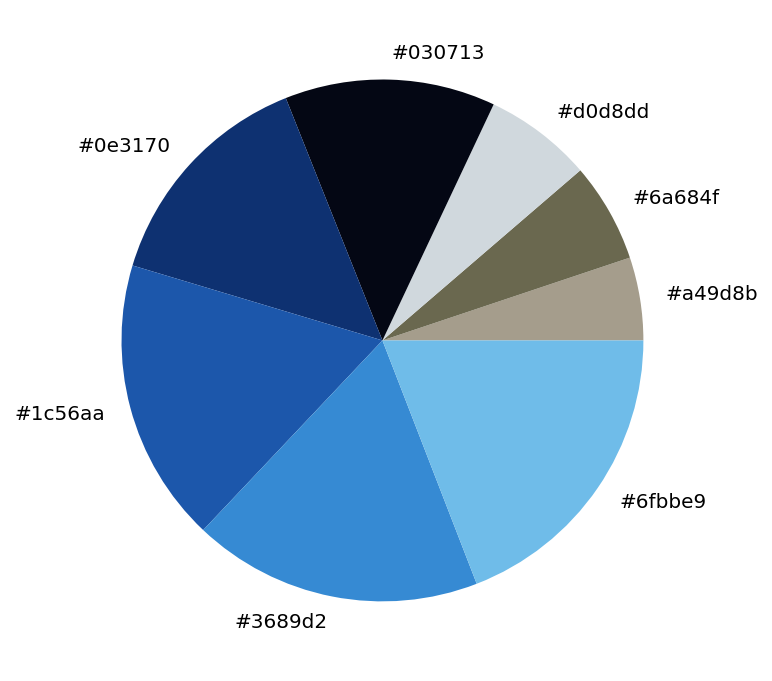

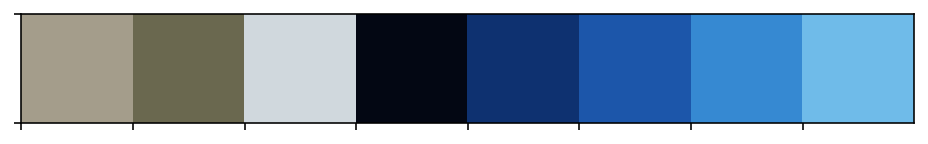

In [6]:
get_colors(image1, 8, True)
#Author: Adam & Anna

[array([ 67.39620833, 112.90299583, 157.90556667])]

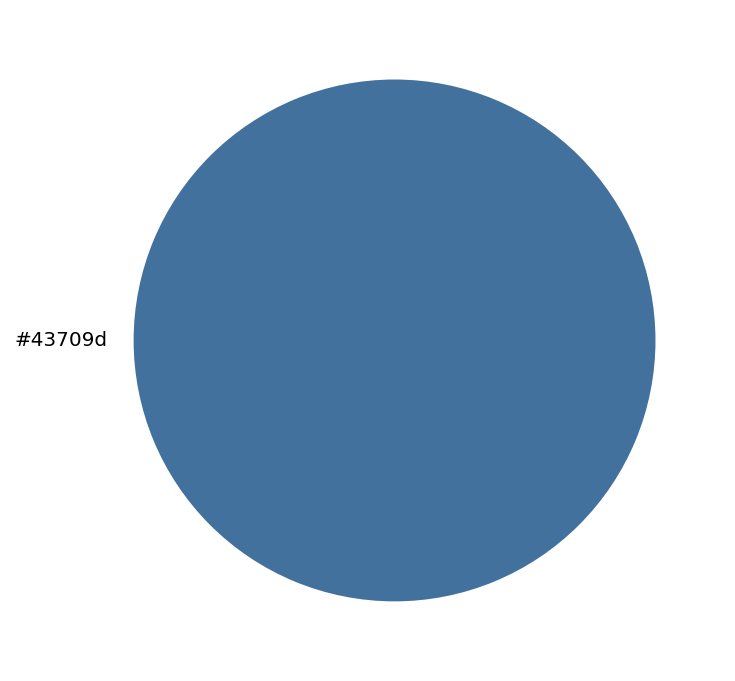

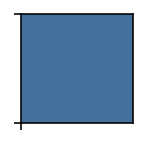

In [19]:
get_colors(image1, 1, True)

### Part 2
Image identification based on color.

In [7]:
#Import image2
image2_path = './Anna_Adam_Project_Image2.jpg'
image2 = cv2.imread(image2_path)
#Author: Adam

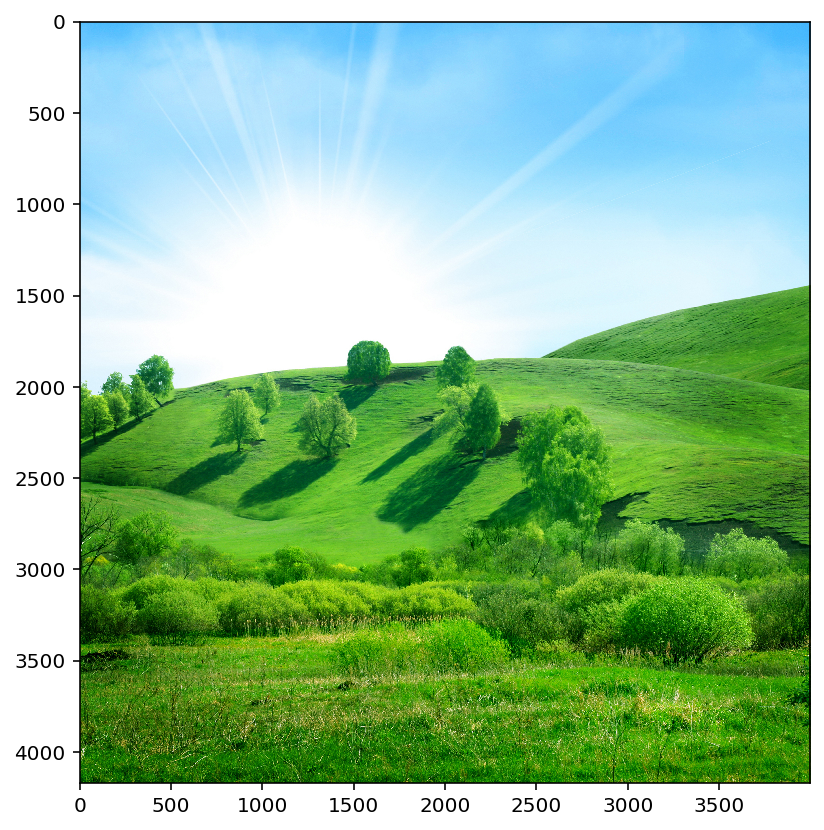

In [8]:
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
#image2 source: https://all-free-download.com/free-photos/download/beautiful-natural-scenery-04-hd-pictures_166229.html
#Author: Adam

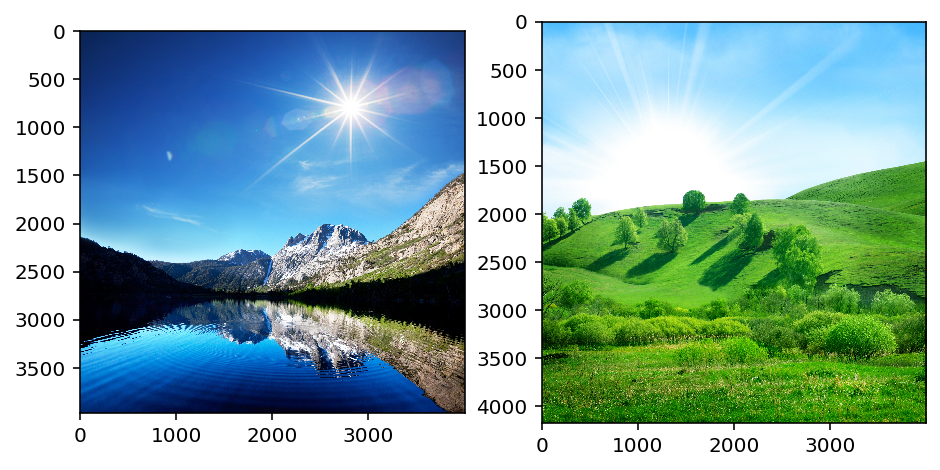

In [9]:
#List of images that the function can choose from
images = [image1, image2]
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
#Author: Adam

In [10]:
#Part 2
import os

IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
}
#Author: Adam

In [11]:
#Image Identification-Color
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    return select_image
#Author: Adam

In [12]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1
#Author: Adam

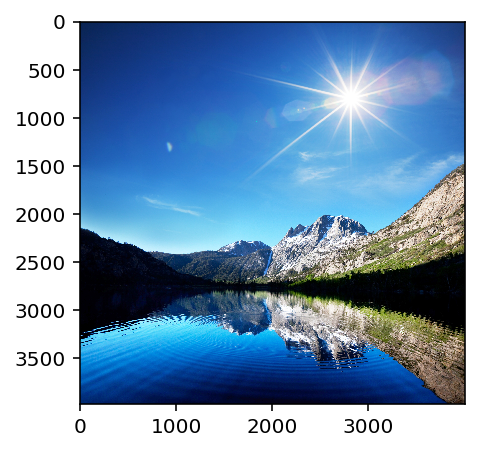

In [13]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)
#Author: Adam

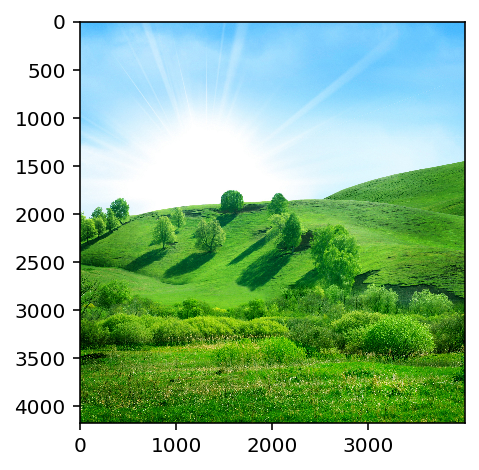

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)
#Author: Adam

# Conclusion
Clustering is a useful way to analyze the distribution of colors in images, and it is easy to interpret the results of clusterings. By looking at the pie chart and the color palette, we are able to have a general overview of how an image looks like, especially the major color components. From our examples, we've show that clustering can correctly identify the color components of these images. This concept can be expanded to a larger set of images in which looking through all of them manually would be very tedious. This implementation of clustering allows the user to easily find a specific photo without doing too much work.

Coding part by Adam & Anna; 
Intro by Anna, Conclusion by Anna & Adam.